## Submitted by:  SANTOSHI PATNAIK, (DS-2306)

# Project.6: Loan Application Status Prediction

### Project Description:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [3]:
import pandas as pd                              # importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_loan=pd.read_csv('loan_prediction.csv')
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

In [6]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df_loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
df_loan.shape

(614, 13)

In [9]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


-> from the dataset info we can observe the data set contains total 614 number of rows and 13 number of columns.. and the data types of the columns are mostlt of "object" and "float" type

###  Cheking for null values

In [10]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

-> we can observ the dataset contains some of null values.. lets visualize it through heatmap

<AxesSubplot:>

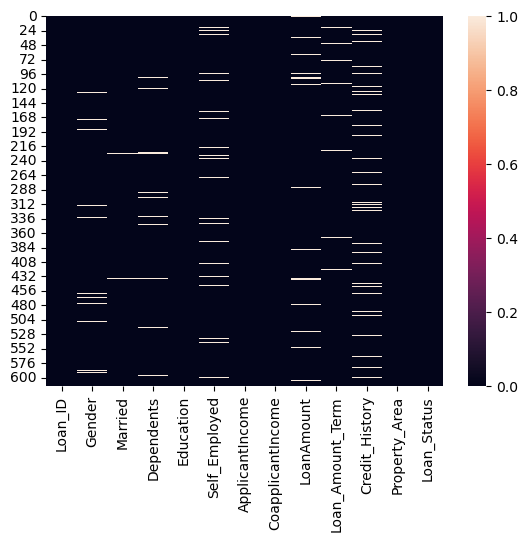

In [11]:
# Visualizing through Heatmap
sns.heatmap(df_loan.isnull())

-> we can observe some of categorical columns like ('Gender','Married','Dependents','Self Employed') contains null values i.e missing values.. so we can replace the null values by MODE values in this categorical columns

-> in numerical columns we can replace the missing values by MEAN of their values

In [12]:
# Replacing Null Values in Categorical columns with Mode() value
df_loan["Gender"]=df_loan["Gender"].fillna(df_loan["Gender"].mode()[0])
df_loan["Dependents"]=df_loan["Dependents"].fillna(df_loan["Dependents"].mode()[0])
df_loan["Self_Employed"]=df_loan["Self_Employed"].fillna(df_loan["Self_Employed"].mode()[0])
df_loan["Married"]=df_loan["Married"].fillna(df_loan["Married"].mode()[0])

In [13]:
# replacing the null values in the numerical coumns by their mean() value
df_loan["LoanAmount"]=df_loan["LoanAmount"].fillna(df_loan["LoanAmount"].mean())
df_loan["Loan_Amount_Term"]=df_loan["Loan_Amount_Term"].fillna(df_loan["Loan_Amount_Term"].mean())
df_loan["Credit_History"]=df_loan["Credit_History"].fillna(df_loan["Credit_History"].mean())


<AxesSubplot:>

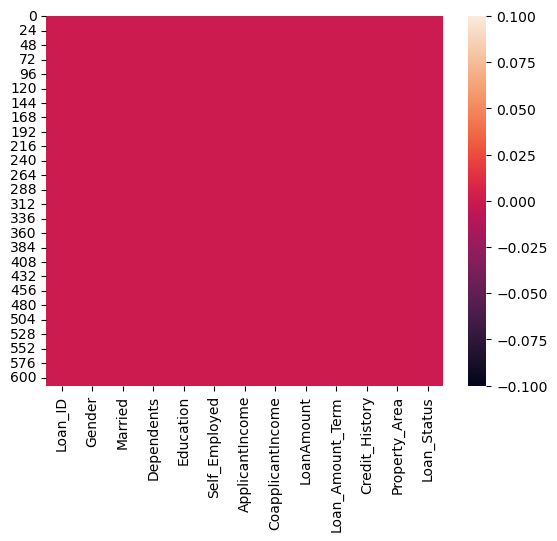

In [14]:
# Visualizing heatmap after replacing null values
sns.heatmap(df_loan.isnull())

-> we can see all the Null values are replaced and now the data set contains no null values in it.. so we can proceed further

In [15]:
df_loan['ApplicantIncome'].astype(float)

0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8072.0
612    7583.0
613    4583.0
Name: ApplicantIncome, Length: 614, dtype: float64

## Statistical Description:

In [16]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### Observation:

1. The Count Of all the columns are same.. so there is no missing data in the dataset.
2. There is a Huge difference between 75% and Max value which shows some Outliers present in the data
3. in 'ApplicantIncome','CoapplicantIncome','LoanAmount'the mean value is less than median value which shows the data is left skewed in remaining column the data is +vely skewed

## Data Visualization:

####  Univariate Analysis:


Male      502
Female    112
Name: Gender, dtype: int64


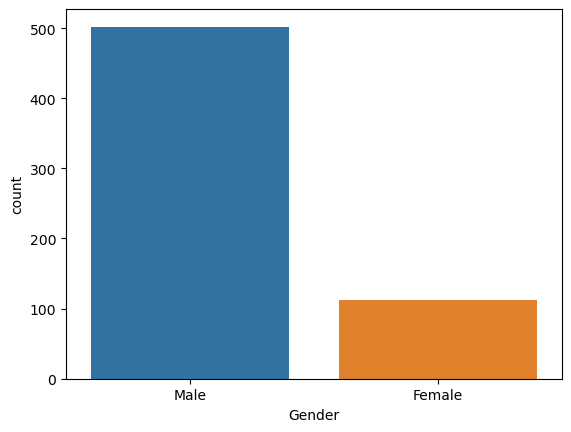

In [17]:
#visualizing the count of "Gender" column:
p=sns.countplot(x='Gender',data=df_loan)
print(df_loan['Gender'].value_counts())

#### Observations:
-> from above plot we can observe The number of Male Applicant(502) are more compared to the Femal loan Applicant(112).. 

Yes    401
No     213
Name: Married, dtype: int64


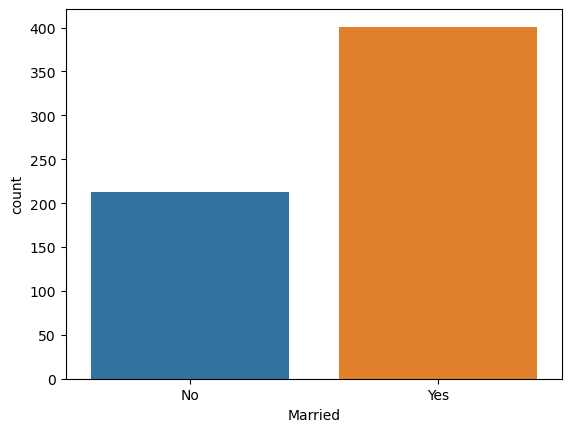

In [18]:
#visualizing the count of "Married " column:
p=sns.countplot(x='Married',data=df_loan)
print(df_loan['Married'].value_counts())

-> From above plt we can see maximum number of loan applicants are of "married" in comparision with unmarried loan applicants. 
-> in number wise we can say married applicants=401, unmarried applicants=213

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


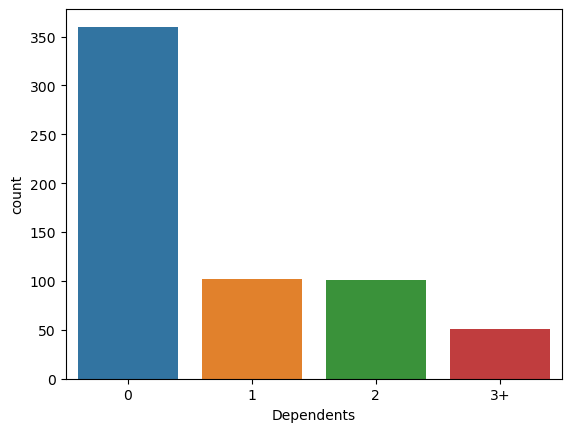

In [19]:
#visualizing the count of "Dependents" column:
p=sns.countplot(x='Dependents',data=df_loan)
print(df_loan['Dependents'].value_counts())

##### Observations:
-> maximun number of loan applicants have no dependents,(350)
-> applicants having 1 or 2 dependents are of neary same ratio(101 or 102)
-> the number of applicants who have more than 3 dependents are less compared to others(51)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


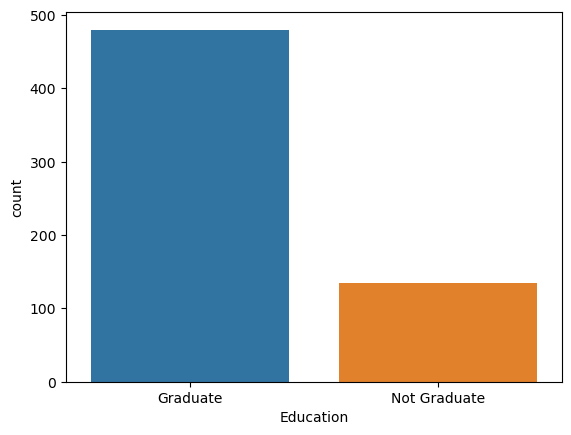

In [20]:
#visualizing the count of "Education" column:
p=sns.countplot(x='Education',data=df_loan)
print(df_loan['Education'].value_counts())

###### Observations:
-> from above plot we can say that maximum number of loan applicants are Graduates(480)
-> non gratuates applying for loan is less compared to graduates(134)

No     532
Yes     82
Name: Self_Employed, dtype: int64


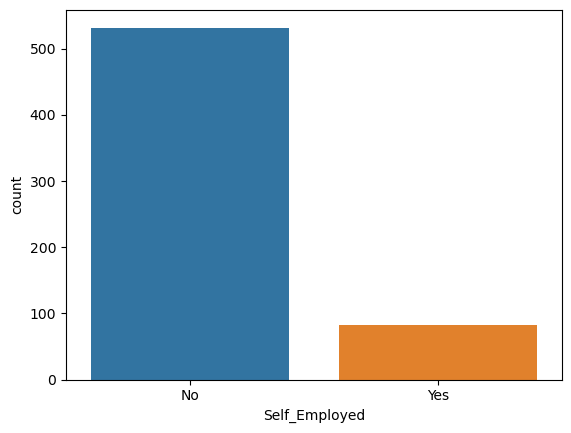

In [21]:
#visualizing the count of "Self_Employed" column:
p=sns.countplot(x='Self_Employed',data=df_loan)
print(df_loan['Self_Employed'].value_counts())

-> from above plot we can observe that more number of Salaried persons are applying for loan compared to Self_Employed ones

Y    422
N    192
Name: Loan_Status, dtype: int64


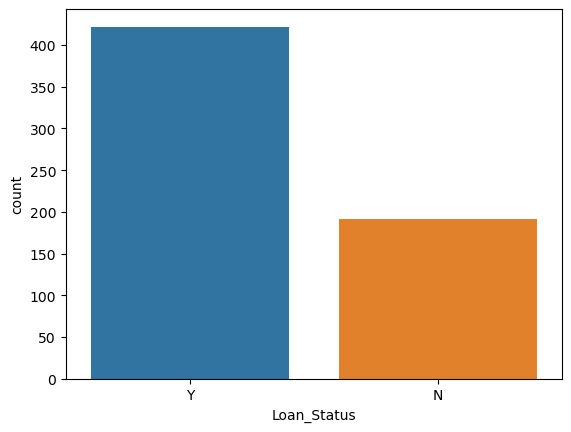

In [22]:
#visualizing the count of "Loan Status" column:              # the target Variable:
p=sns.countplot(x='Loan_Status',data=df_loan)
print(df_loan['Loan_Status'].value_counts())

#### Observations:
-> Total number of Approved Loan are more compared to unapproved loans

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


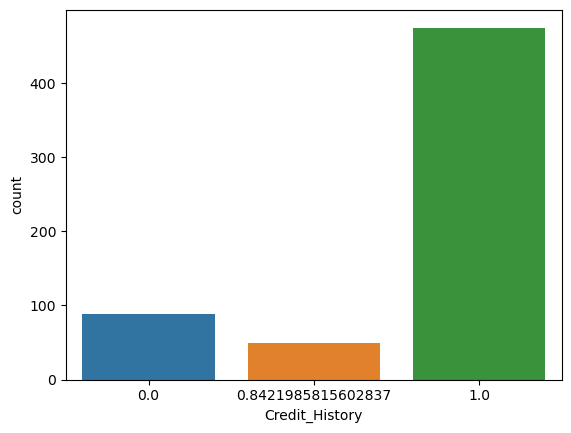

In [23]:
#visualizing the count of "Credit_History" column:             
p=sns.countplot(x='Credit_History',data=df_loan)
print(df_loan['Credit_History'].value_counts())

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


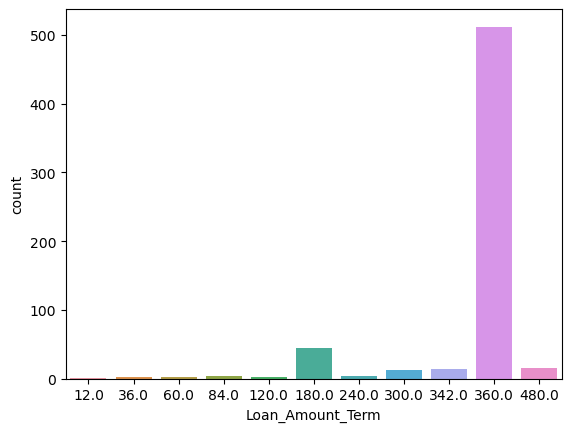

In [24]:
#visualizing the count of "Loan_Amount_Term" column:           
p=sns.countplot(x='Loan_Amount_Term',data=df_loan)
print(df_loan['Loan_Amount_Term'].value_counts())

####Observation:
Maximum Applicants are opting for loan amount term 360

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


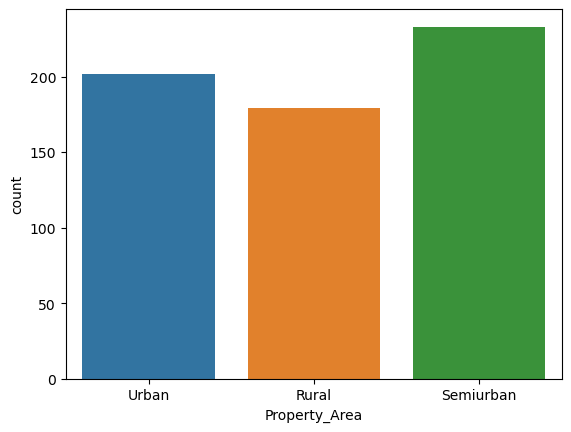

In [25]:
#visualizing the count of "Property_Area" column:           
p=sns.countplot(x='Property_Area',data=df_loan)
print(df_loan['Property_Area'].value_counts())

-> loan applicants in semiurban area are a bit more compare to other urban and rural areas.. 

### Bivariate analysis:


<function matplotlib.pyplot.show(close=None, block=None)>

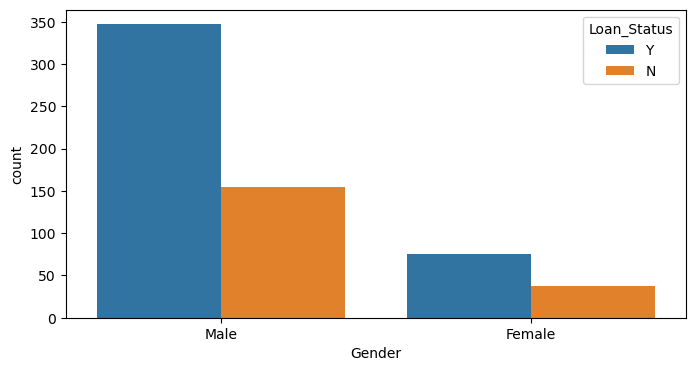

In [26]:
# Gender vs Loan Status:
plt.figure(figsize=(8,4))
sns.countplot(x="Gender", hue="Loan_Status", data=df_loan)
plt.show

### Observations:
-> irrspective of number of male and feamle applicant the loan approval percentage is almost same in both the Gender

<function matplotlib.pyplot.show(close=None, block=None)>

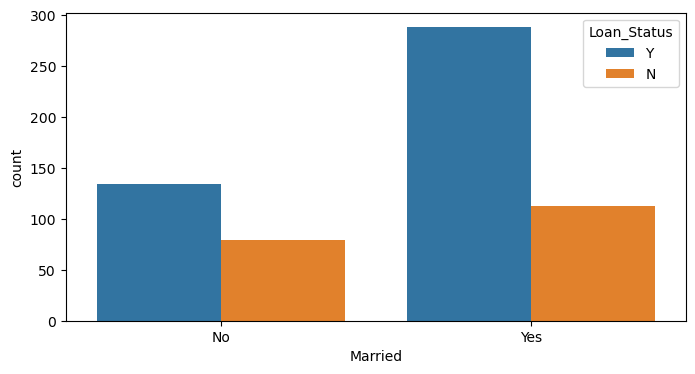

In [27]:
# Married vs Loan Status:
plt.figure(figsize=(8,4))
sns.countplot(x="Married", hue="Loan_Status", data=df_loan)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

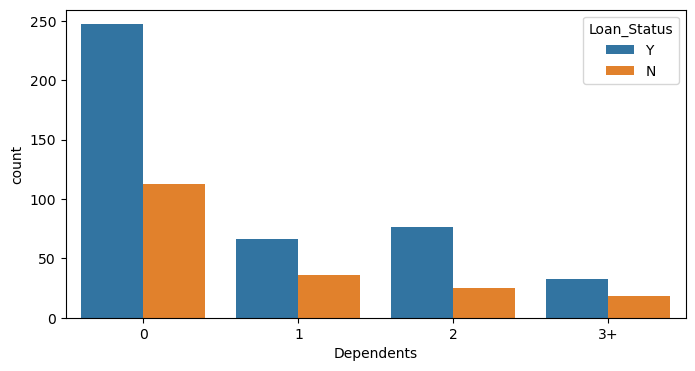

In [28]:
# Dependents vs Loan Status:
plt.figure(figsize=(8,4))
sns.countplot(x="Dependents", hue="Loan_Status", data=df_loan)
plt.show

###### Observation:
-> Applicants having no depensents or 1 or 2 are more likely to get loan Approvals and also number of Applicants also more in "No dependents" category hence loan approvals also more

<function matplotlib.pyplot.show(close=None, block=None)>

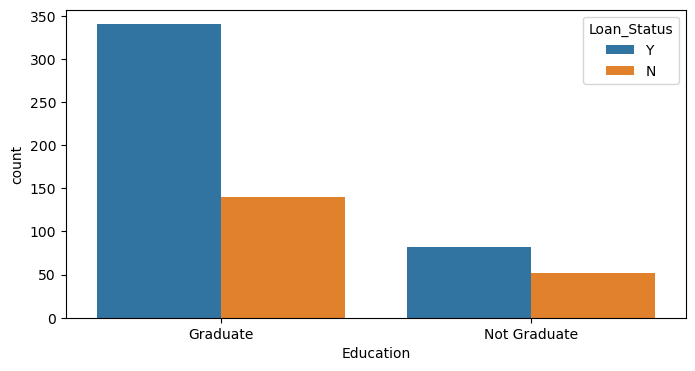

In [29]:
# Education vs Loan Status:
plt.figure(figsize=(8,4))
sns.countplot(x="Education", hue="Loan_Status", data=df_loan)
plt.show

##### Observation: 
-> In case of Graduted loan approval chance is more

<function matplotlib.pyplot.show(close=None, block=None)>

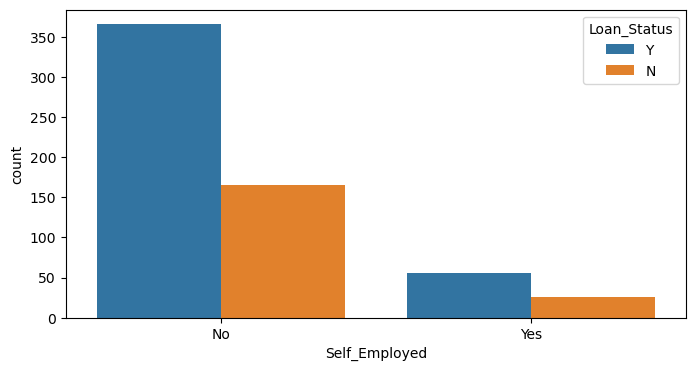

In [30]:
# Self_Employed vs Loan Status:
plt.figure(figsize=(8,4))
sns.countplot(x="Self_Employed", hue="Loan_Status", data=df_loan)
plt.show

##### Observations:
-> The Loan Approval percentage is almost same in both Self emploeed and Salaried Persons.. as though the number of applicants are more in Salaried Category

<function matplotlib.pyplot.show(close=None, block=None)>

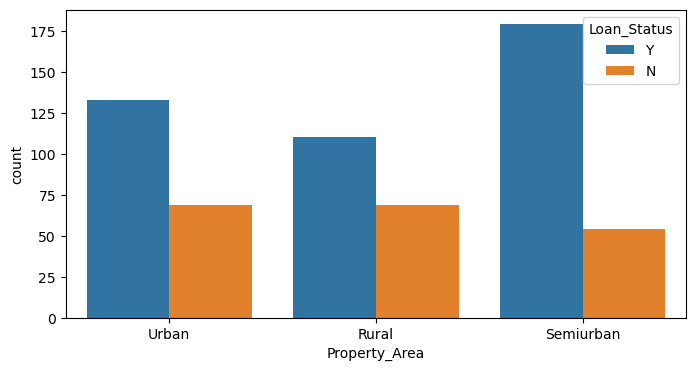

In [31]:
# Property_Area vs Loan Status:
plt.figure(figsize=(8,4))
sns.countplot(x="Property_Area", hue="Loan_Status", data=df_loan)
plt.show

#### observation:
-> in Rural Area Loan_Approval Status is high campared to other two areas.

-> In Urban Areas the Loan Aproval percentage is above 50% 

-> but in Semi urban Areas the Loan Approval Percentage is less comapred to other areas.. as we can see the number of Applicants in semi urban Area is higher.. but number of approvals are less

### Pair Plot

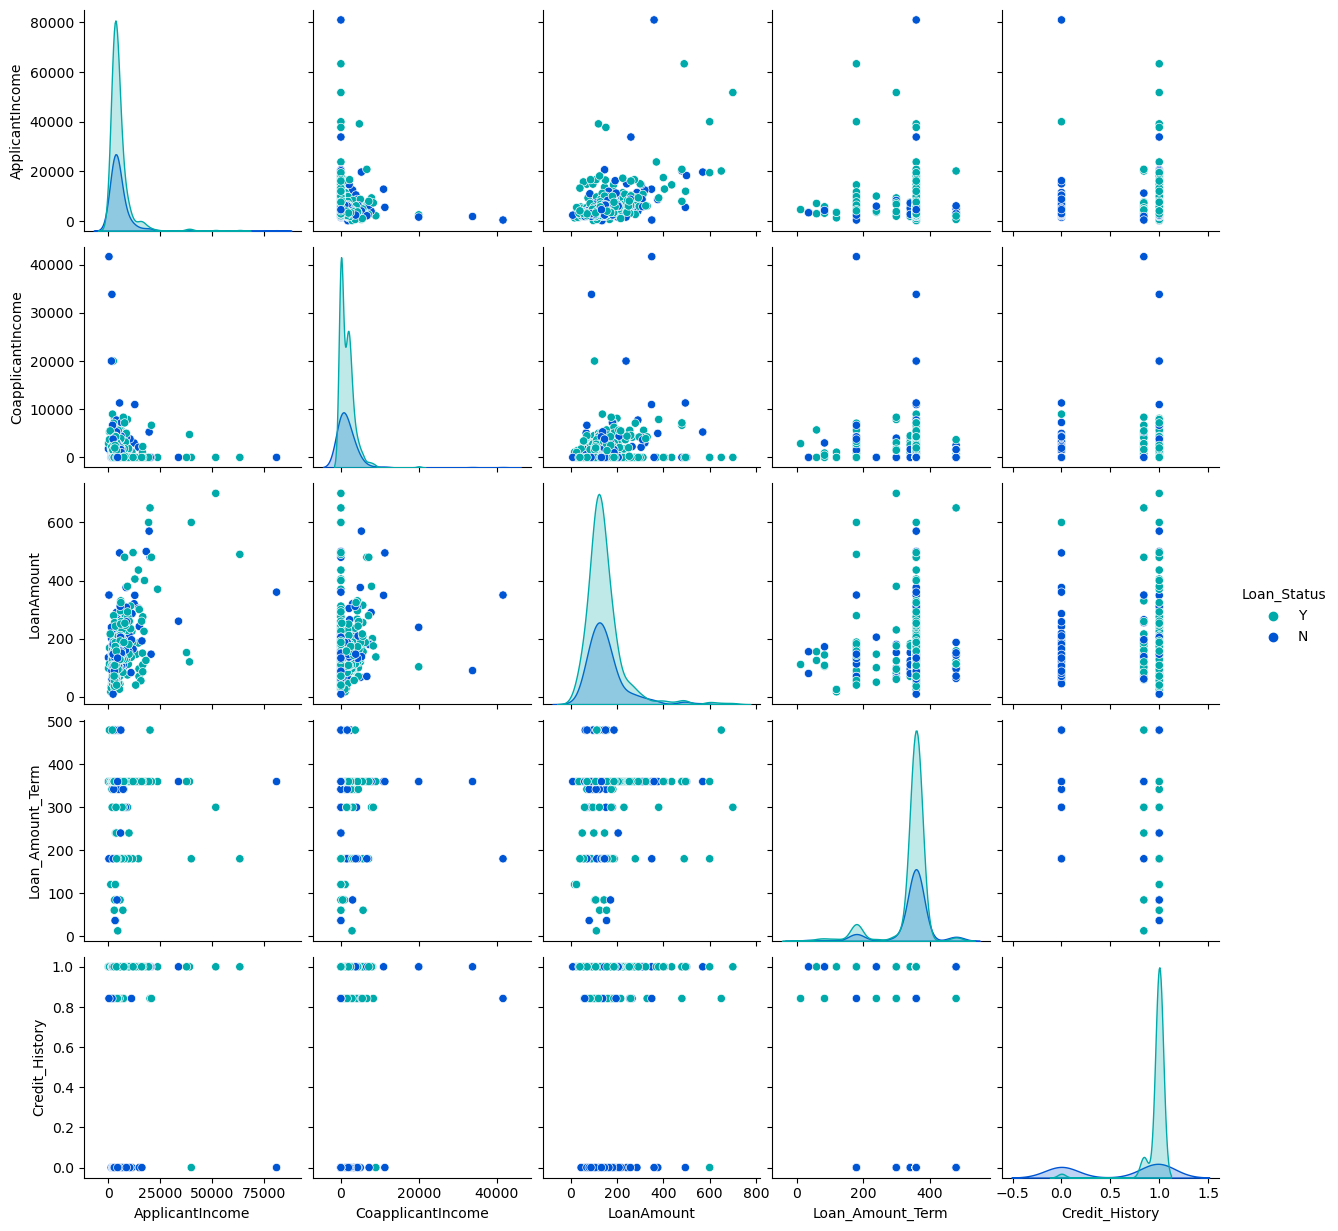

In [32]:
sns.pairplot(df_loan,hue='Loan_Status',palette='winter_r')
plt.show()

## Feature Engineering:

In [33]:
# Encoding Categorical Columns:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_loan.columns:
    if df_loan[i].dtypes=="object":
        df_loan[i]=OE.fit_transform(df_loan[i].values.reshape(-1,1))    
df_loan       

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


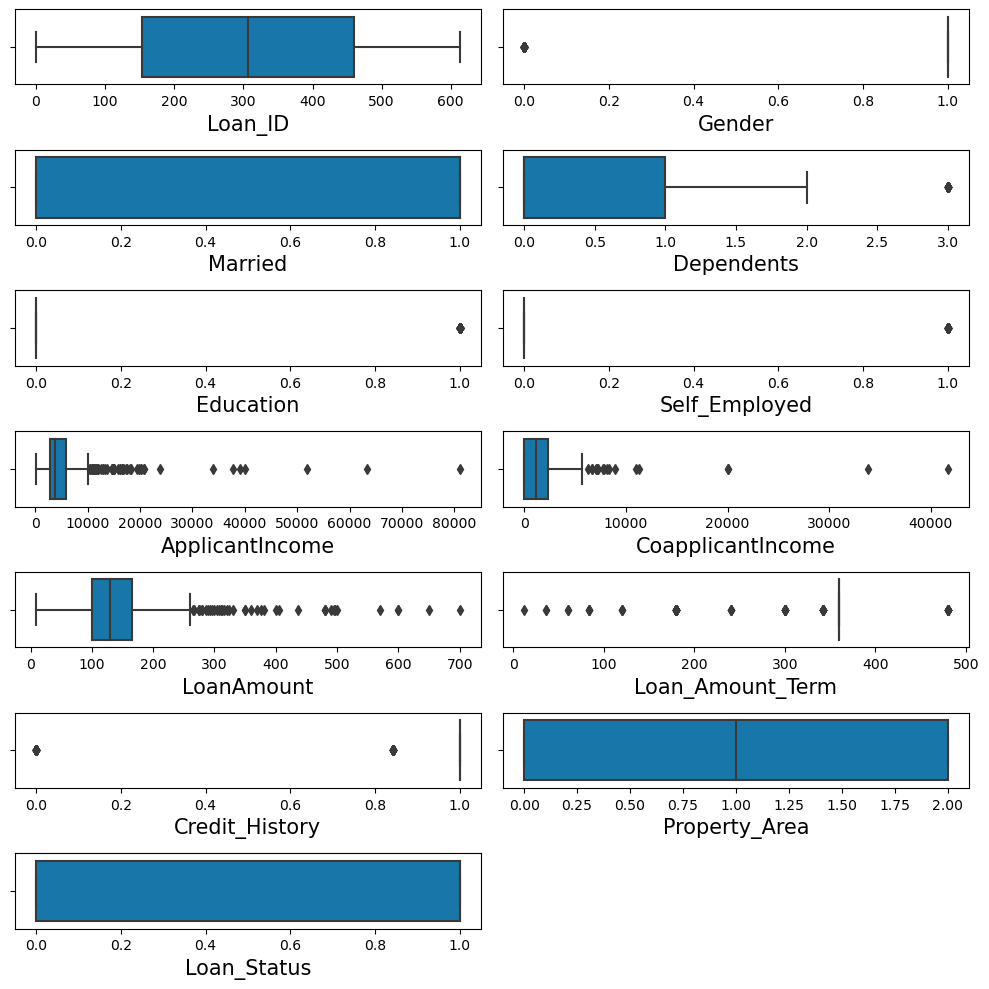

In [34]:
# checking for outliers
plt.figure(figsize=(10,10),facecolor="white")
plotnum=1
for i in df_loan.columns:
    if plotnum<=14:
        p=plt.subplot(7,2,plotnum)
        sns.boxplot(df_loan[i],palette='winter_r')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
        plotnum+=1
plt.tight_layout()    

->dropping some of columns which are not much necessary for the prediction

In [35]:
df_loan.drop(['Loan_ID'],axis=1,inplace=True)             

In [36]:
df_loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
# removing utliers from other columns using Z-Score method
from scipy.stats import zscore
out_features=df_loan[['Gender','Dependents','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']]
z=np.abs(zscore(out_features))
z

,Gender,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.472343,0.737806,0.392601,0.072991,0.554487,0.000000,0.279851,0.451640
1,0.472343,0.253470,0.392601,0.134412,0.038732,0.219273,0.279851,0.451640
2,0.472343,0.737806,2.547117,0.393747,0.554487,0.957641,0.279851,0.451640
3,0.472343,0.737806,0.392601,0.462062,0.251980,0.314547,0.279851,0.451640
4,0.472343,0.737806,0.392601,0.097728,0.554487,0.064454,0.279851,0.451640
...,...,...,...,...,...,...,...,...
609,2.117107,0.737806,0.392601,0.410130,0.554487,0.898095,0.279851,0.451640
610,0.472343,2.236021,0.392601,0.212557,0.554487,1.267279,2.518655,0.451640
611,0.472343,0.253470,0.392601,0.437174,0.472404,1.269371,0.279851,0.451640
612,0.472343,1.244745,0.392601,0.357064,0.554487,0.483367,0.279851,0.451640


In [38]:
#threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([4, 6, 6, 6, 3, 5, 6, 3, 5, 3, 5, 4, 5, 3, 3, 6, 6, 5, 5, 6, 3, 5,
        5, 4, 3, 4, 5, 3, 5, 6, 6, 5, 5, 5, 6, 5, 6, 4, 6, 4, 5],
       dtype=int64))

In [39]:
# we have to removethese rows which have outliers:
df_loan1=df_loan[(z<3).all(axis=1)]
df_loan1.shape          # after removing outliers the data frame size

(577, 12)

In [40]:
df_loan.shape                       # original dataframe size

(614, 12)

In [41]:
#data loss percentage:
print("data loss percentage",((df_loan.shape[0]-df_loan1.shape[0])/df_loan.shape[0])*100)

data loss percentage 6.026058631921824


#### The dataloss percentage is effordable so we can proceed further

In [42]:
#checking for skewness present in the data:
df_loan1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

-> some +ve and -ve skewness is present in the data.. so we have to remove the skewness for the better performance of the model

In [44]:
df_loan1['Dependents']=np.log2(df_loan1['Dependents']+1)
df_loan1['ApplicantIncome']=np.log2(df_loan1['ApplicantIncome']+1)
df_loan1['CoapplicantIncome']=np.log2(df_loan1['CoapplicantIncome']+1)
df_loan1['LoanAmount']=np.log2(df_loan1['LoanAmount']+1)
df_loan1['Self_Employed']=np.log2(df_loan1['Self_Employed']+2)



In [45]:
df_loan1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

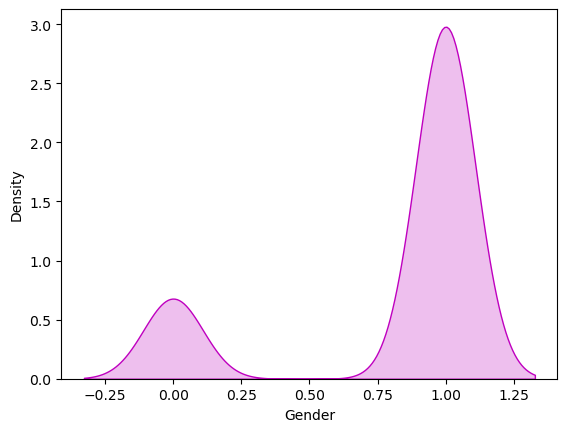

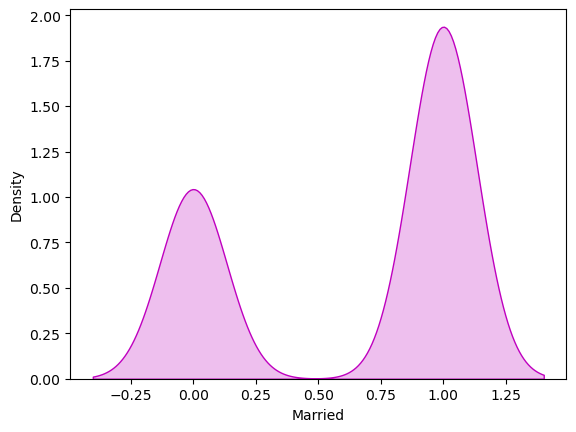

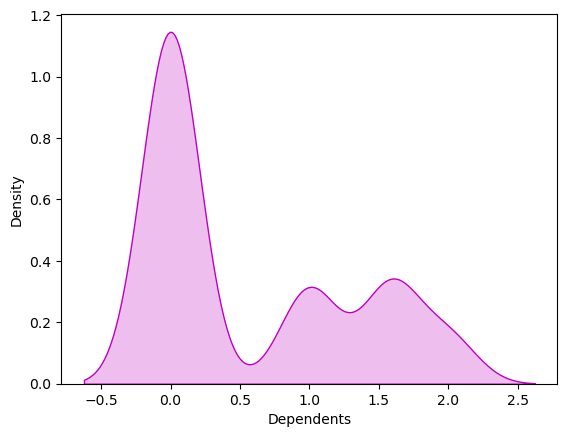

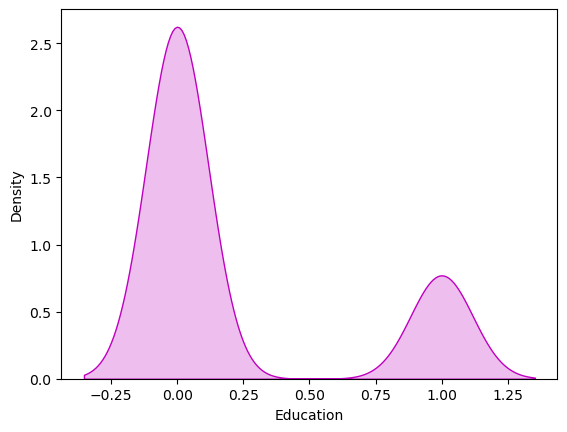

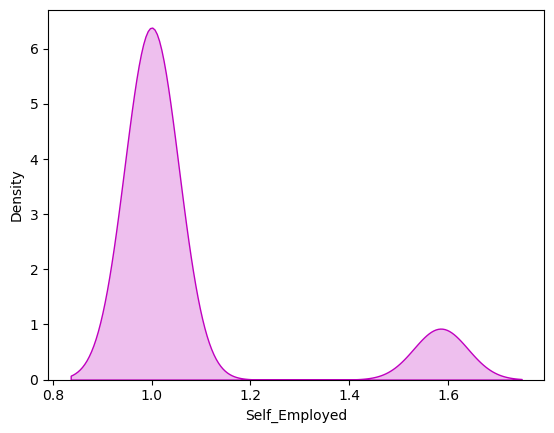

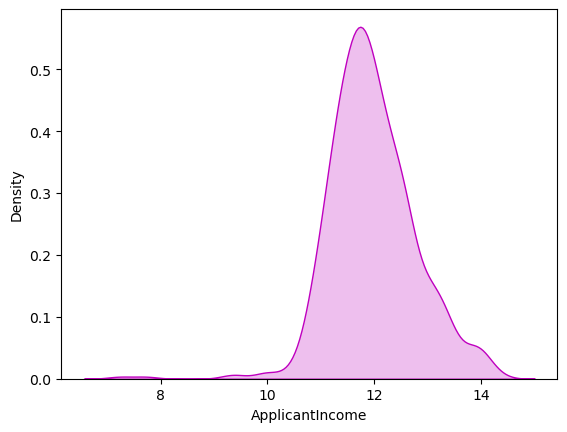

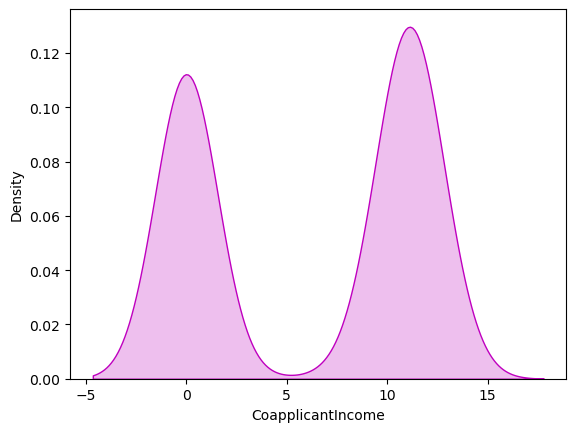

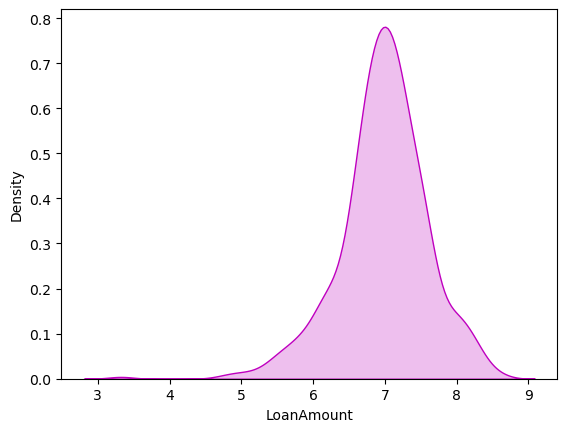

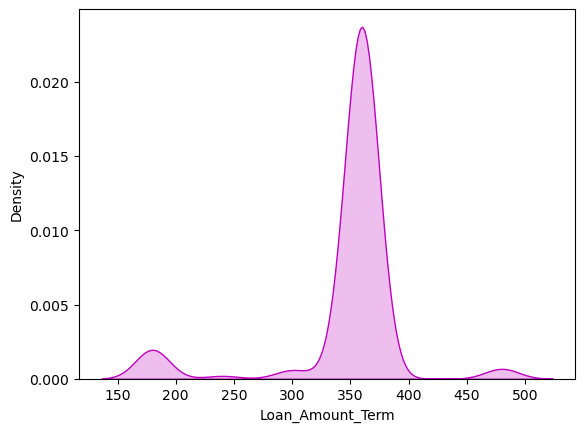

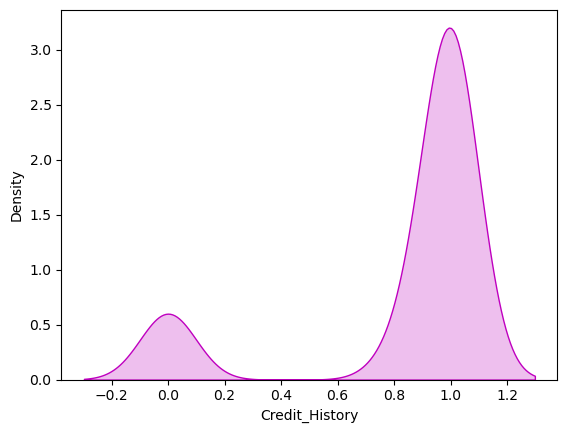

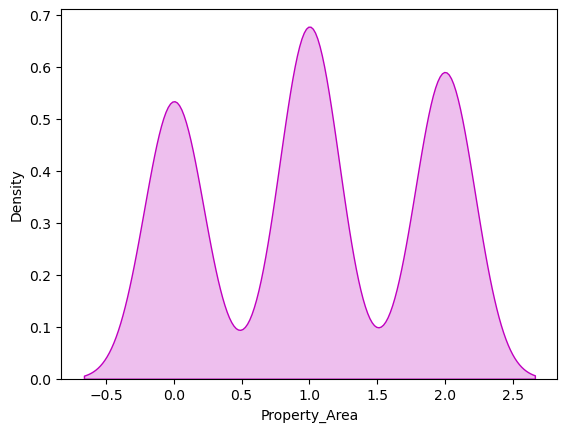

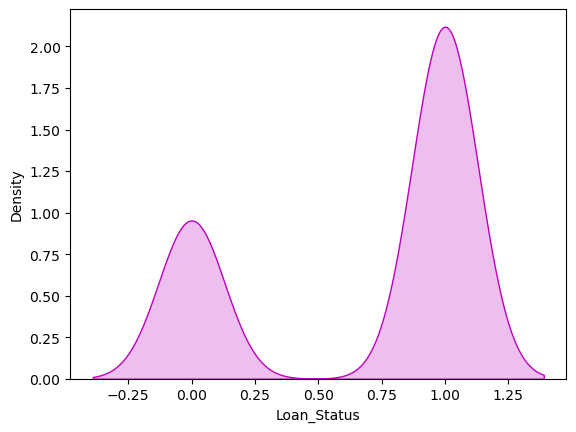

In [46]:
#visualizing the spreading of data
for i in df_loan1.columns:
    sns.distplot(df_loan1[i],color="m",kde_kws={"shade":True},hist=False)
    plt.show()

# Correlation Matrix:


In [47]:
# corelation between target variable and features
corr=df_loan1.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188828,0.045696,-0.006207,0.060302,0.235133,0.177720,-0.104412,0.016566,-0.026340,0.017408
Married,0.378997,1.000000,0.345029,0.024817,-0.015779,-0.026283,0.339399,0.186356,-0.127289,0.013364,0.010595,0.089026
Dependents,0.188828,0.345029,1.000000,0.065629,0.056754,0.108236,0.018101,0.130287,-0.090803,-0.016299,0.021226,0.019319
Education,0.045696,0.024817,0.065629,1.000000,-0.007139,-0.174609,0.054682,-0.110204,-0.094628,-0.080920,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.056754,-0.007139,1.000000,0.207418,-0.089466,0.113287,-0.033346,-0.014899,-0.028253,-0.026525
ApplicantIncome,0.060302,-0.026283,0.108236,-0.174609,0.207418,1.000000,-0.362495,0.405411,-0.069412,0.033186,-0.010603,-0.001761
CoapplicantIncome,0.235133,0.339399,0.018101,0.054682,-0.089466,-0.362495,1.000000,0.196642,0.002962,0.003324,-0.072402,0.081455
LoanAmount,0.177720,0.186356,0.130287,-0.110204,0.113287,0.405411,0.196642,1.000000,0.052385,-0.015488,-0.103225,-0.023549
Loan_Amount_Term,-0.104412,-0.127289,-0.090803,-0.094628,-0.033346,-0.069412,0.002962,0.052385,1.000000,0.030430,-0.058990,-0.018144
Credit_History,0.016566,0.013364,-0.016299,-0.080920,-0.014899,0.033186,0.003324,-0.015488,0.030430,1.000000,-0.009747,0.561857


In [48]:
corr['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.561857
Married              0.089026
CoapplicantIncome    0.081455
Property_Area        0.026507
Dependents           0.019319
Gender               0.017408
ApplicantIncome     -0.001761
Loan_Amount_Term    -0.018144
LoanAmount          -0.023549
Self_Employed       -0.026525
Education           -0.092658
Name: Loan_Status, dtype: float64

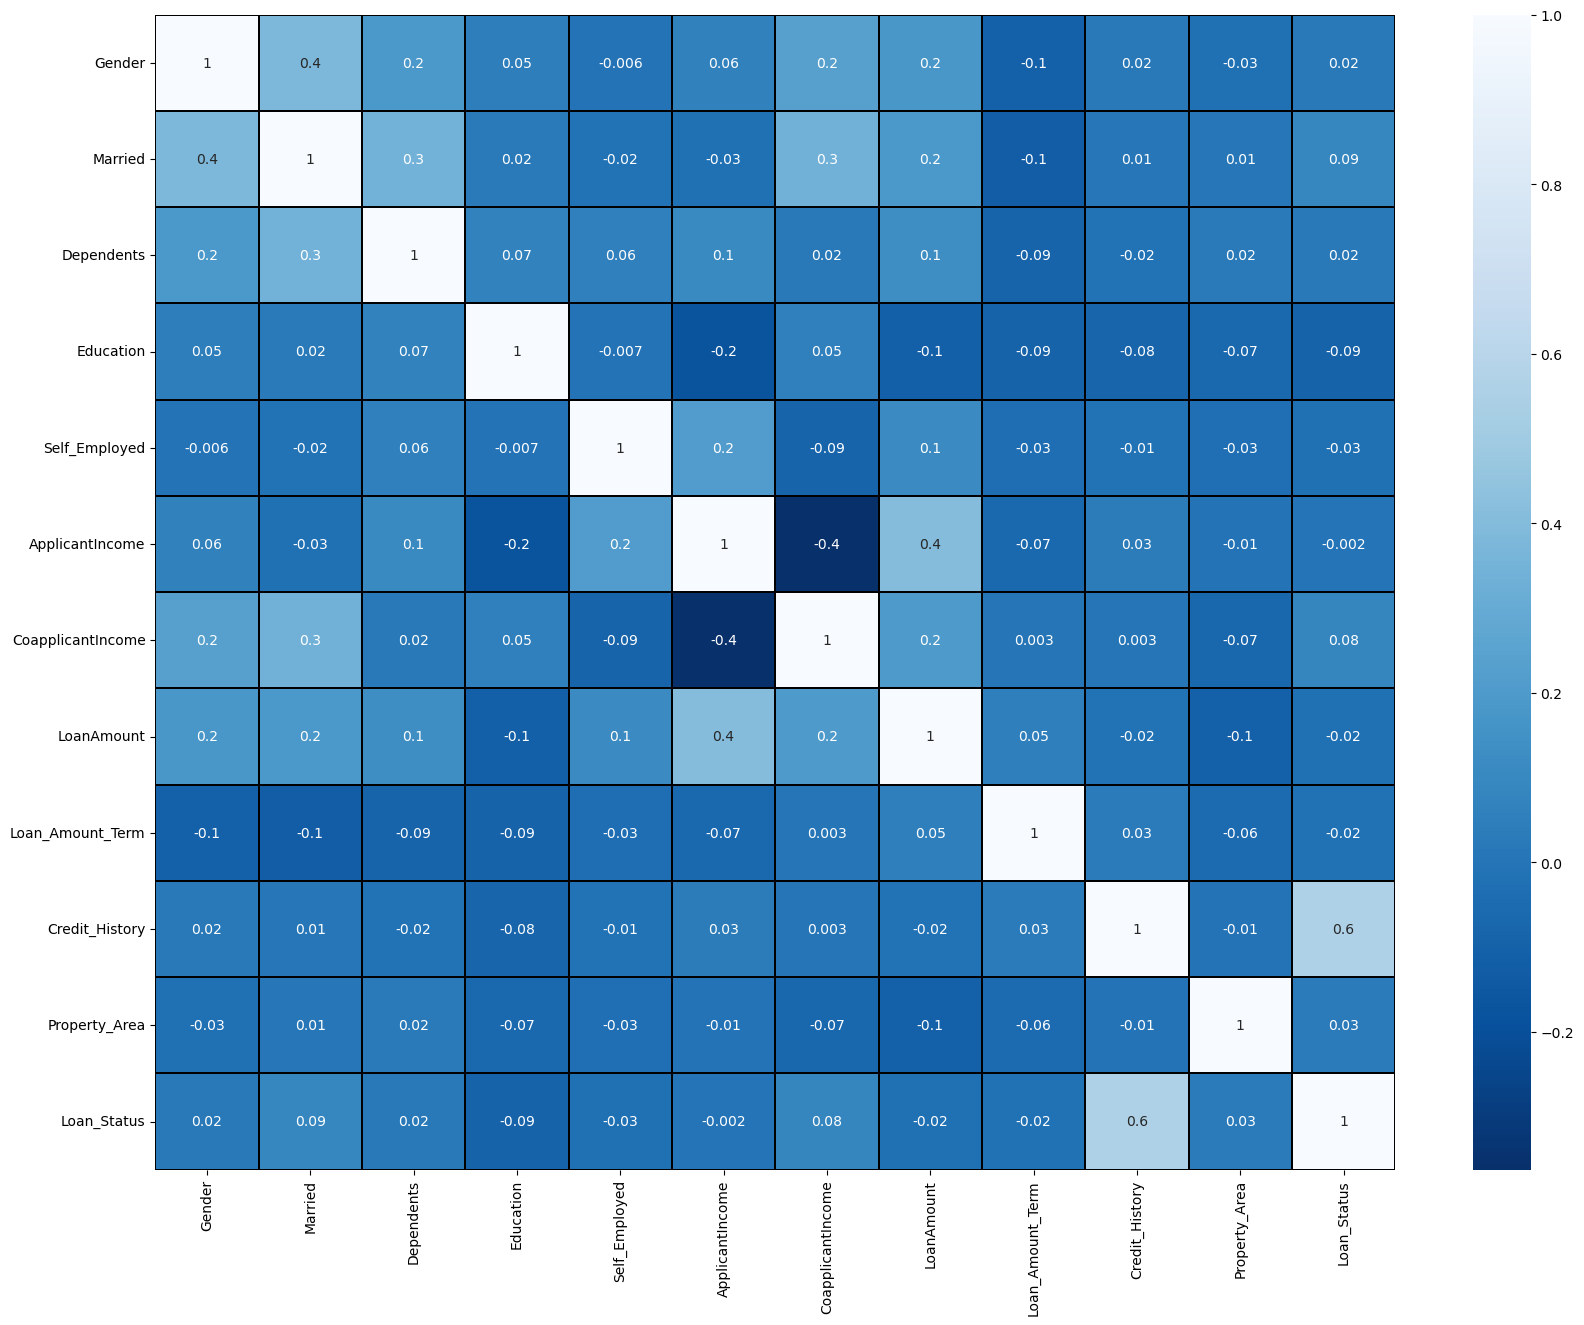

In [49]:
#visualizing the corelation matrix by using the heaatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_loan1.corr(),linewidth=0.1,fmt='0.1g',linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

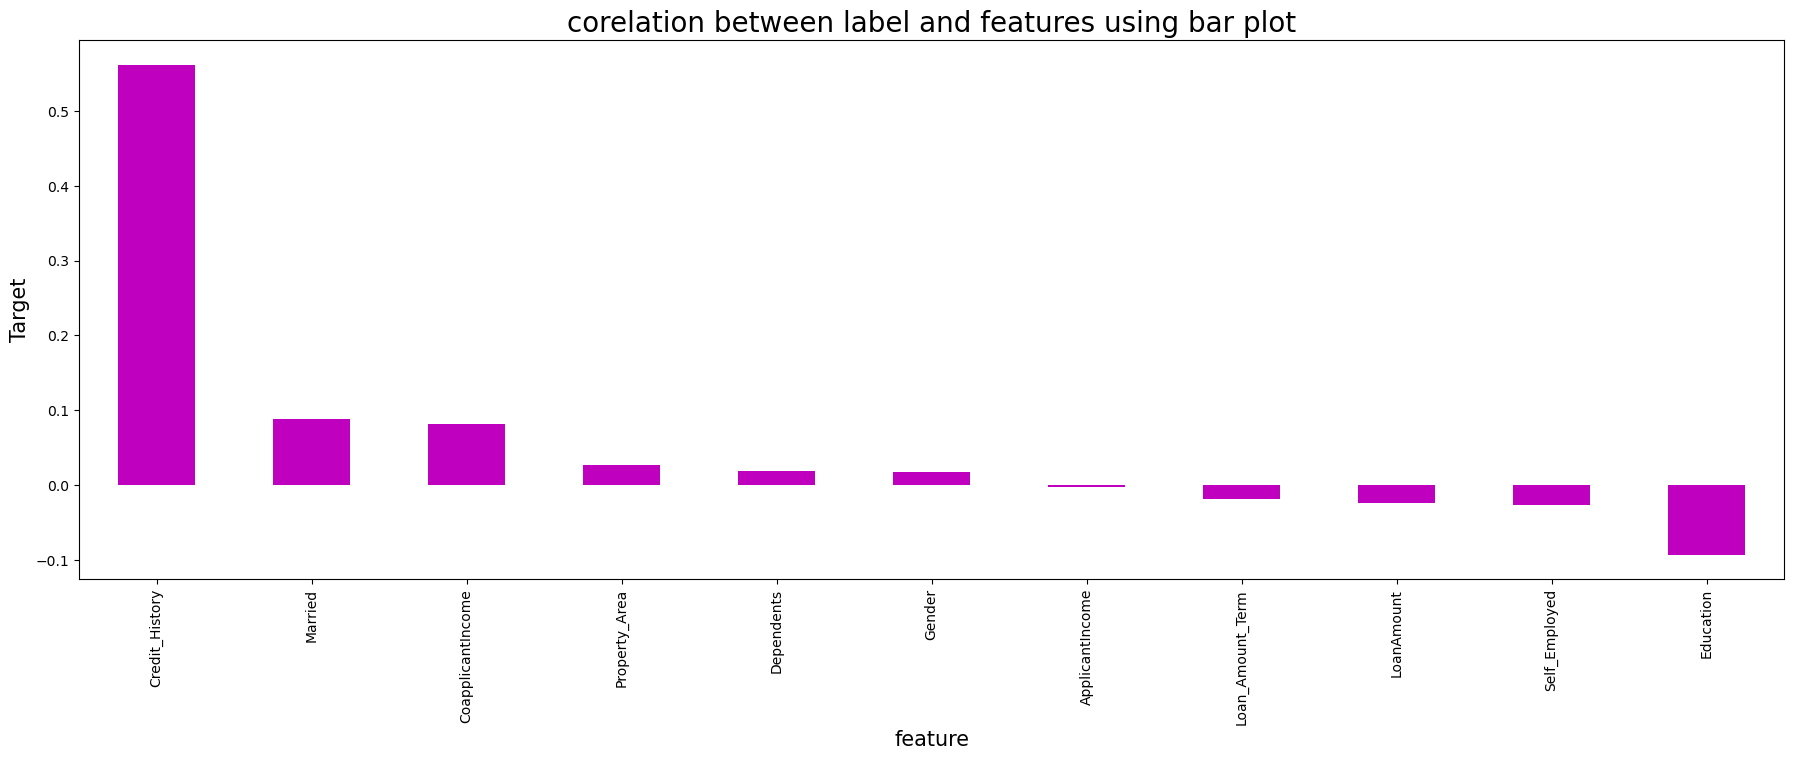

In [50]:
# visualizing the corelation using barplot:
plt.figure(figsize=(22,7))
df_loan1.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("corelation between label and features using bar plot",fontsize=20)
plt.show()


## Checking For Multicolinearity:

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df_loan.values,i) for i in range(df_loan.shape[1])]
vif['Features']= df_loan.columns
vif
	

,VIF,Features
0,6.012207,Gender
1,3.698535,Married
2,1.791650,Dependents
3,1.309569,Education
4,1.176570,Self_Employed
5,2.890183,ApplicantIncome
6,1.485526,CoapplicantIncome
7,6.861649,LoanAmount
8,10.364315,Loan_Amount_Term
9,8.971709,Credit_History


->here we can check there is no multicolinearity present.. becoz all the variance values are with in the range of 10 only

In [52]:
#separating target variable and input variable

x=df_loan1.drop('Loan_Status',axis=1)
y=df_loan1['Loan_Status']

In [53]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,1.000000,12.514221,0.000000,7.203712,360.0,1.0,2.0
1,1.0,1.0,1.000000,0.0,1.000000,12.162391,10.559377,7.011227,360.0,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.584963,11.551228,0.000000,6.066089,360.0,1.0,2.0
3,1.0,1.0,0.000000,1.0,1.000000,11.335390,11.203960,6.918863,360.0,1.0,2.0
4,1.0,0.0,0.000000,0.0,1.000000,12.550987,0.000000,7.149747,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,1.000000,11.502335,0.000000,6.169925,360.0,1.0,0.0
610,1.0,1.0,2.000000,0.0,1.000000,12.003869,0.000000,5.357552,180.0,1.0,0.0
611,1.0,1.0,1.000000,0.0,1.000000,12.978889,7.912889,7.988685,360.0,1.0,2.0
612,1.0,1.0,1.584963,0.0,1.000000,12.888743,0.000000,7.554589,360.0,1.0,2.0


In [54]:
# feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.775143,-0.541961,-0.380580,0.688861,-1.127469,0.369286,0.239408,0.456461,1.227472
1,0.477137,0.733939,0.573759,-0.541961,-0.380580,0.249082,0.780679,0.055093,0.239408,0.456461,-1.306522
2,0.477137,0.733939,-0.775143,-0.541961,2.627567,-0.514859,-1.127469,-1.487655,0.239408,0.456461,1.227472
3,0.477137,0.733939,-0.775143,1.845150,-0.380580,-0.784651,0.897159,-0.095673,0.239408,0.456461,1.227472
4,0.477137,-1.362511,-0.775143,-0.541961,-0.380580,0.734818,-1.127469,0.281199,0.239408,0.456461,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.775143,-0.541961,-0.380580,-0.575974,-1.127469,-1.318164,0.239408,0.456461,-1.306522
573,0.477137,0.733939,1.922662,-0.541961,-0.380580,0.050933,-1.127469,-2.644201,-3.237229,0.456461,-1.306522
574,0.477137,0.733939,0.573759,-0.541961,-0.380580,1.269687,0.302441,1.650597,0.239408,0.456461,1.227472
575,0.477137,0.733939,1.362817,-0.541961,-0.380580,1.157006,-1.127469,0.942022,0.239408,0.456461,1.227472


In [55]:
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

In [56]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [57]:
# to balance the target variable data over sampling is performed:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [58]:
y1.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

# modeling

from the target variable we can observe that the given problem statement is a binary classification problem.. so we can apply Naive Bayes classifier, logistic regression knn descission tree.. 

In [59]:
#finding the best random state:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("maximum acc_score is",maxAcc, "on random_state",maxRs)        

maximum acc_score is 0.7839195979899497 on random_state 86


In [61]:
# creating train test split:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=maxRs)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(597, 11)
(597,)
(199, 11)
(199,)


In [62]:
#Logistic regression model:
logR=LogisticRegression()
logR.fit(x_train,y_train)
pred_train=logR.predict(x_train)
pred_Lgr=logR.predict(x_test)
print("predicted accuracy",accuracy_score(y_test,pred_Lgr))
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_Lgr))
print(classification_report(y_test,pred_Lgr))


predicted accuracy 0.7839195979899497
accuracy score of original y_test data 0.7135678391959799
[[ 52  32]
 [ 11 104]]
              precision    recall  f1-score   support

         0.0       0.83      0.62      0.71        84
         1.0       0.76      0.90      0.83       115

    accuracy                           0.78       199
   macro avg       0.80      0.76      0.77       199
weighted avg       0.79      0.78      0.78       199



In [63]:
#DecissionTreeClassifier:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score of original y_test data 1.0
0.7989949748743719
[[67 17]
 [23 92]]
              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        84
         1.0       0.84      0.80      0.82       115

    accuracy                           0.80       199
   macro avg       0.79      0.80      0.80       199
weighted avg       0.80      0.80      0.80       199



In [64]:
#RandomForestClassifier:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))


0.8844221105527639
[[ 74  10]
 [ 13 102]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87        84
         1.0       0.91      0.89      0.90       115

    accuracy                           0.88       199
   macro avg       0.88      0.88      0.88       199
weighted avg       0.89      0.88      0.88       199



In [65]:
#KNeighborsClassifier:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))


0.7336683417085427
[[65 19]
 [34 81]]
              precision    recall  f1-score   support

         0.0       0.66      0.77      0.71        84
         1.0       0.81      0.70      0.75       115

    accuracy                           0.73       199
   macro avg       0.73      0.74      0.73       199
weighted avg       0.75      0.73      0.74       199



In [66]:
#GaussianNB:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))


0.7939698492462312
[[ 45  39]
 [  2 113]]
              precision    recall  f1-score   support

         0.0       0.96      0.54      0.69        84
         1.0       0.74      0.98      0.85       115

    accuracy                           0.79       199
   macro avg       0.85      0.76      0.77       199
weighted avg       0.83      0.79      0.78       199



## Cross Validating the Models:

In [67]:
# cross validation of the model:
from sklearn.model_selection import cross_val_score

In [68]:
score_LR=cross_val_score(logR,x1,y1)           #cross validation score of logistic regression
print(score_LR)
print(score_LR.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_Lgr)-(score_LR.mean()))

[0.70625    0.71698113 0.72955975 0.68553459 0.6918239 ]
0.7060298742138365
diff b/w accuracy score and cross validation score is: 0.07788972377611325


In [69]:
score_dtc=cross_val_score(dtc,x1,y1)           #cross validation score of dtc
print(score_dtc)
print(score_dtc.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_dtc)-(score_dtc.mean()))

[0.71875    0.68553459 0.81132075 0.8490566  0.83647799]
0.7802279874213837
diff b/w accuracy score and cross validation score is: 0.018766987452988215


In [70]:
score_RFC=cross_val_score(RFC,x1,y1)                           #cross validation score of RandomForest
print(score_RFC)
print(score_RFC.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_RFC)-(score_RFC.mean()))

[0.75625    0.78616352 0.8490566  0.83647799 0.93081761]
0.8317531446540881
diff b/w accuracy score and cross validation score is: 0.05266896589867576


In [71]:
score_knn=cross_val_score(knn,x1,y1)                           #cross validation score of knn
print(score_knn)
print(score_knn.mean())
print("diff b/w acscuracy score and cross validation score is:",accuracy_score(y_test,pred_knn)-(score_knn.mean()))

[0.68125    0.71069182 0.72955975 0.72327044 0.77358491]
0.7236713836477987
diff b/w acscuracy score and cross validation score is: 0.009996958060743966


In [72]:
score_gnb=cross_val_score(gnb,x1,y1)                           #cross validation score of GaussianNB
print(score_gnb)
print(score_gnb.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_gnb)-(score_gnb.mean()))

[0.68125    0.70440252 0.75471698 0.70440252 0.70440252]
0.7098349056603773
diff b/w accuracy score and cross validation score is: 0.08413494358585383


##### By varifying the cross validation score and the accuracy score we can conclude that the RandomForest Classifier Model is providing better prediction

## Hyper Parameter Tuning:

In [73]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]})

In [74]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 50}

In [75]:
MODEL_LOAN=RandomForestClassifier(bootstrap= True,criterion= 'gini',max_depth= 10,max_features= 'log2',n_estimators= 50)

# Final Model

In [76]:
# Final Model:
MODEL_LOAN.fit(x_train,y_train)
pred=MODEL_LOAN.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.92964824120602


##### in the final Model we are getting 85.92% accuracy

In [77]:
import joblib
joblib.dump(MODEL_LOAN,'Loan Prediction Analysis')


['Loan Prediction Analysis']

In [78]:
RFC_LOAN=joblib.load('Loan Prediction Analysis')
predictionM=RFC_LOAN.predict(x_test)
predictionM

array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.])

In [79]:
a=np.array(y_test)
DF_LOAN=pd.DataFrame()
DF_LOAN['predicted']=predictionM
DF_LOAN['original']=a
DF_LOAN

,predicted,original
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
194,0.0,0.0
195,0.0,1.0
196,0.0,0.0
197,0.0,1.0
